# Исследование объявлений о продаже квартир


<div style="border:solid blue 2px; padding: 20px">
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div style="border:solid orange 2px; padding: 20px">
    
# Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

- balcony — число балконов

- ceiling_height — высота потолков (м)

- cityCenters_nearest — расстояние до центра города (м)

- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

- first_day_exposition — дата публикации

- floor — этаж

- floors_total — всего этажей в доме

- is_apartment — апартаменты (булев тип)

- kitchen_area — площадь кухни в квадратных метрах (м²)

- last_price — цена на момент снятия с публикации

- living_area — жилая площадь в квадратных метрах (м²)

- locality_name — название населённого пункта

- open_plan — свободная планировка (булев тип)

- parks_around3000 — число парков в радиусе 3 км

- parks_nearest — расстояние до ближайшего парка (м)

- ponds_around3000 — число водоёмов в радиусе 3 км

- ponds_nearest — расстояние до ближайшего водоёма (м)

- rooms — число комнат

- studio — квартира-студия (булев тип)

- total_area — общая площадь квартиры в квадратных метрах (м²)

- total_images — число фотографий квартиры в объявлении

<div style="border:solid orange 2px; padding: 20px">

# Шаги работы
1. Предобработка данных (выявление и исправление проблем в данных):
   - выявление пропусков
   - аномалии
   - дубликаты
   - корректный тип данных
   - добавление новых переменных (важных в рамках анализа)

2. Предварительный анализ данных:
   - распределение переменных
   - определение особенностей и закономерностей

3. Изучение скорости продажи квартир:
   - динамика продаж
   - определение быстрых и аномально медленных продаж
  
4. Определение факторов влияющийх на стоимость объекта:
   - изучение зависимости стоимости квартиры от площади (общая, жилая, площадь кухни)
   - изучение зависимости стоимости квартиры от количества комнат
   - изучение зависимости стоимости квартиры от типа этажа, на котором расположена квартира
   - изучение зависимости стоимости квартиры от даты размедения (день недели, месяц, год)

5. Определение стоимость квадратного метра в топ-10 городах с наибольшим числом объявлений:
   - определение списка 10 городов с наибольшим числом объявлений на платформе
   - подсчет средней стоимости квадратного метра для каждого из 10 населенных пунктов
  
6. Изучение изменения стоимости квартир в Санкт-Петербурге в зависимости удаленности от центра
   - изучение зависимости стоимости квартиры от расстояния до центра в конкретном населенном пункте

## Загрузка и знакомство с данными

In [46]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [47]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [48]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [49]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

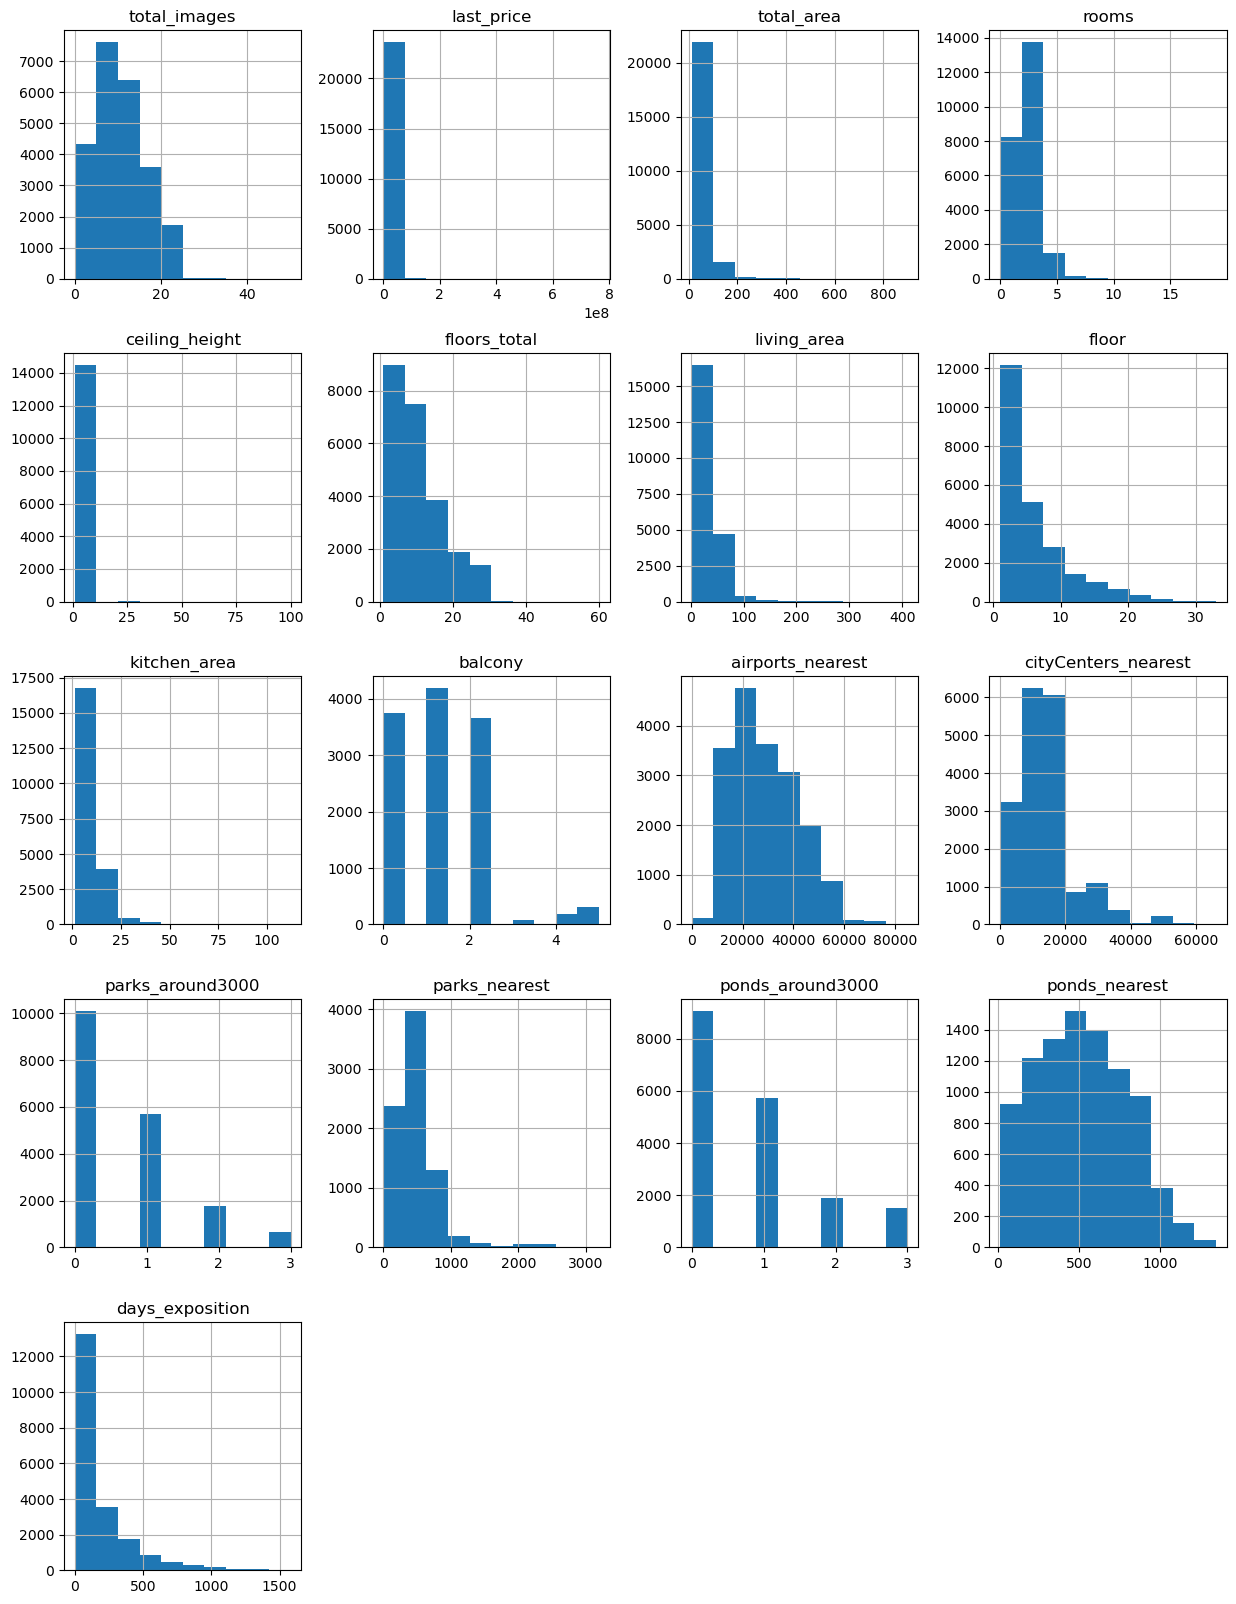

In [50]:
data.hist(figsize=(15, 20))

*по графикам можно заметить, что распределение переменных last_price и cieling_heigh представленно в виде одного столбика гистограммы, что может быть связано с большим разбросом данных - наличием выбросов.*

In [51]:
data.shape

(23699, 22)

In [52]:
data = data.drop_duplicates()

In [53]:
data.shape

(23699, 22)

##  Предобработка данных

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Значения пропущены в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

Колонки, в которых пропущено больше всего значений и стоит обратить на них внимание: 
- ceiling_height: много пропущенных значений. Эта переменная заполняется пользователями, а не автоматически. Однако, по распределению переменной видно, что высота потолков, как правило не превышает 3 метров. Следовательно, пропуски в переменной можно будет заполнить медианным значением. 

- floors_total: имеет пропущенные значения, однако характеристики распределения (близкое к нормальному) позволяют заполнить пропуски медианным значением

- living_area: распределение значений переменной также близкое к нормальному, что позволяет заполнить пропуски медианным значением

- is_apartment: эта переменная имеет булев тип, и вероятно пропущенные значения обозначают 0, то есть, что квартира не является апартаментами + тип данных переменной неверный (object а не bool)

- kitchen_area: распределение значений переменной также близкое к нормальному, что позволяет заполнить пропуски медианным значением

- balcony: неверный тип данных переменной (должен быть int) + пропущенные значения вероятно предполагает отсутвие балкона 

- parks_nearest и ponds_nearest: так как данные по этим переменным автоматически получаются из геосервиса, а не заполняются пользователем, возможно существует проблема с подгрузки данных из геосервиса или определением геосервисом парков и водоемов.В схожих переменных (airports_nearest, cityCenters_nearest), хранящих информацию о расстоянии до определенного объекта также пропущено много значений.

- days_exposition: неревное значение переменной (должен быть int) + распределение значений переменной также близкое к нормальному, что позволяет заполнить пропуски медианным значением


***
**Summary**

*Заменить пропуски медианным значением (в силу характеристик распределения):*
- ceiling_height
- floors_total
- living_area
- kitchen_area
- days_exposition

*Заменить пропуски на 0*:
- balcony
- parks_around3000 - отсутвие данных, ворятно означает отсутсвие парков в радиусе 3 км
- ponds_around3000 - отсутвие данных, ворятно означает отсутсвие водоеомв в радиусе 3 км

*Пропуски из-за проблем автоматической подгрузки данных из геосервиса*:
- airports_nearest
- cityCenters_nearest
- parks_nearest
- ponds_nearest
- locality_name

*Заменить тип данных (в силу смысла, который несут данные):*
- first_day_exposition (object -> date_time)
- floors_total (float -> int) - число этажей не может быть нецелым
- is_apartment (object -> bool)
- balcony (float -> int) - число балконов не может быть нецелым
- parks_around3000 (float -> int) - количество ближайших парков не может быть нецелым числом 
- ponds_around3000 (float -> int) - количество ближайших водоемов не может быть нецелым числом 
- days_exposition (float -> int) - количество дней не может быть нецелым

***

In [55]:
#заполняем пропуски
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [56]:
#заполнение количества этажей 
data['floors_total'] = data.apply(lambda row: data['floors_total'].median() if (row['floors_total']==None)&(data['floors_total'].median()>row['floor']) else row['floor'] if (row['floors_total']==None)&(data['floors_total'].median()<=row['floor']) else 0, axis=1)

In [40]:
data.shape

(23699, 22)

In [41]:
#исключения записей, где сумма кухонной и жилой площадт превышает общую плозадь 
data = data.loc[(data['total_area']!=0)&(data['total_area'] > data['living_area']+data['kitchen_area'])]

In [42]:
data.shape

(22886, 22)

In [57]:
#проверка заполнения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [58]:
#замена типа данных в обозначенных столбцах
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')


In [59]:
#проверка изменения типа данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [542]:
# изучим уникальные значения в столбце с названиями местности (locality_name ) и устраним неявные дубликаты
data['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64

In [543]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [544]:
data['locality_name'].nunique()

364

In [545]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок'], 'поселок городского типа', regex=True)
) 

In [546]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

In [547]:
#устранили неявные дупликаты
data['locality_name'].nunique()

323

***
**Вывод по предобработке данных (1.2)**

1. Были изычены пропуски данных. Где было возможно пропуски были заменены медианными или нулевыми значениями:
   - Заменены медианным значением: ceiling_height, floors_total, living_area, kitchen_area, days_exposition
   - Заменены нулевым значением: balcony, parks_around3000, ponds_around3000
   - Переменные, где пропуски в данных вероятно связаны с проблемами подгрузки данных и геосервиса: airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, locality_name


2. Были заменены типы данных (в силу смысла, который несут данные):
   - first_day_exposition (object -> date_time)
   - floors_total (float -> int) - число этажей не может быть нецелым
   - is_apartment (object -> bool)
   - balcony (float -> int) - число балконов не может быть нецелым
   - parks_around3000 (float -> int) - количество ближайших парков не может быть нецелым числом
   - ponds_around3000 (float -> int) - количество ближайших водоемов не может быть нецелым числом
   - days_exposition (float -> int) - количество дней не может быть нецелым
  
3. Устранены неявные дупликаты в названиях населенных пунктов (locality_name)

***

## Преобразование данных

**Добавим в таблицу новые столбцы со следующими параметрами:**

- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

- месяц публикации объявления;

- год публикации объявления;

- тип этажа квартиры (значения — «‎первый», «последний», «другой»);

- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [548]:
#создадим переменную цена квадратного метра (price_per_meter), разделив стоимость объекта (last_price) на его общую площадь (total_area)
data['price_per_meter']=(data['last_price'] / data['total_area']).round(2)

In [549]:
#создадим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) (weekday_posted),используя функцию weekday
data['weekday_posted'] = data['first_day_exposition'].dt.weekday

In [550]:
#создадим переменную месяц публикации объявления (month_posted),используя функцию month
data['month_posted'] = data['first_day_exposition'].dt.month

In [551]:
#создадим переменнуюгод публикации объявления (year_posted),используя функцию year
data['year_posted'] = data['first_day_exposition'].dt.year

In [552]:
#создадим переменнуюгод тип этажа квартиры (значения — «‎первый», «последний», «другой») (floor_type)
data['floor_type'] = data.apply(lambda row: 'последний' if row['floor'] == row['floors_total'] else 'первый' if row['floor'] == 1 else 'другой', axis=1)

In [553]:
#создадим переменную расстояние до центра города в километрах (cityCenters_nearest_km)
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

In [554]:
#проверим получившиеся значения
data[['last_price', 'total_area', 'price_per_meter', 'first_day_exposition', 'weekday_posted', 'month_posted', 'year_posted', 'floor', 'floors_total', 'floor_type', 'cityCenters_nearest', 'cityCenters_nearest_km']].head(10)

,last_price,total_area,price_per_meter,first_day_exposition,weekday_posted,month_posted,year_posted,floor,floors_total,floor_type,cityCenters_nearest,cityCenters_nearest_km
0,13000000.0,108.00,120370.37,2019-03-07,3,3,2019,8,16,другой,16028.0,16.0
1,3350000.0,40.40,82920.79,2018-12-04,1,12,2018,1,11,первый,18603.0,19.0
2,5196000.0,56.00,92785.71,2015-08-20,3,8,2015,4,5,другой,13933.0,14.0
3,64900000.0,159.00,408176.10,2015-07-24,4,7,2015,9,14,другой,6800.0,7.0
4,10000000.0,100.00,100000.00,2018-06-19,1,6,2018,13,14,другой,8098.0,8.0
5,2890000.0,30.40,95065.79,2018-09-10,0,9,2018,5,12,другой,NaN,NaN
6,3700000.0,37.30,99195.71,2017-11-02,3,11,2017,6,26,другой,19143.0,19.0
7,7915000.0,71.60,110544.69,2019-04-18,3,4,2019,22,24,другой,11634.0,12.0
8,2900000.0,33.16,87454.76,2018-05-23,2,5,2018,26,27,другой,NaN,NaN
9,5400000.0,61.00,88524.59,2017-02-26,6,2,2017,7,9,другой,15008.0,15.0


In [555]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int32         
 7   living_area             23699 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            23699 non-null  float6

**Вывод**

Результат создания новых переменных корректно отображается в датасете

## Исследовательский анализ данных

**Изучение параметров площади квартиры**
- общей площади (total_area)
- жилая площать (living_area)
- площадь кухни (kitchen_area)

Так как все эти переменные, характеризуют площадб квартиры логично рассмотреть их вместешего парка

array([[<Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'kitchen_area'}>, <Axes: >]], dtype=object)

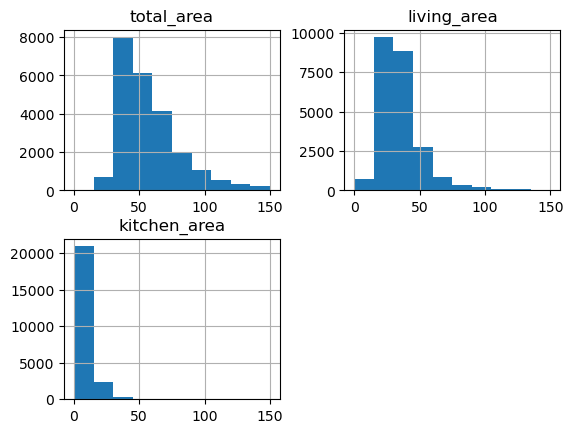

In [556]:
data[['total_area', 'living_area', 'kitchen_area']].hist(range=(0, 150))

In [557]:
data[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23699.000000,23699.000000,23699.000000
mean,60.348651,34.099892,10.428526
std,35.654083,21.162096,5.631126
min,12.000000,2.000000,1.300000
25%,40.000000,19.000000,7.400000
50%,52.000000,30.000000,9.100000
75%,69.900000,41.100000,11.440000
max,900.000000,409.700000,112.000000


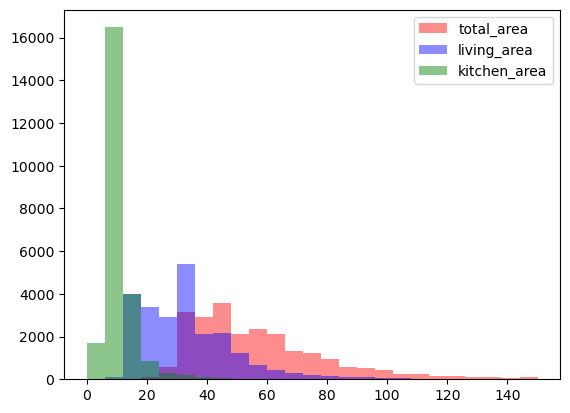

In [558]:
plt.hist(data['total_area'], bins=25, alpha=0.45, color='red', range=(0, 150)) 
plt.hist(data['living_area'], bins=25, alpha=0.45, color='blue', range=(0, 150)) 
plt.hist(data['kitchen_area'], bins=25, alpha=0.45, color='green', range=(0, 150)) 

plt.legend(['total_area',  
            'living_area',
           'kitchen_area']) 

Распределение этих трех переменных отражает тенденцию, которой должны соответствовать каждая запись в датафрейме:

общая площадь квартиры (total_area) > жилая площадь квартиры (living_area) > площадь кухни (kitchen_area)

Проверим удовлетворение этому условию

In [559]:
data.shape

(23699, 28)

In [560]:
data = data.loc[(data['total_area']!=0)&(data['total_area'] > data['living_area'])&(data['living_area'] > data['kitchen_area'])]

In [561]:
data.shape

(23185, 28)

**Вывод (total_area, living_area, kitchen_area)**

Из датафрэйма были исключены переменные, которые не соответсвуют общей логичной тенденции распределения:
общая площадь квартиры (total_area) > жилая площадь квартиры (living_area) > площадь кухни (kitchen_area)

**Изучение переменной количество комнат**

- количество комнат (rooms)

<Axes: >

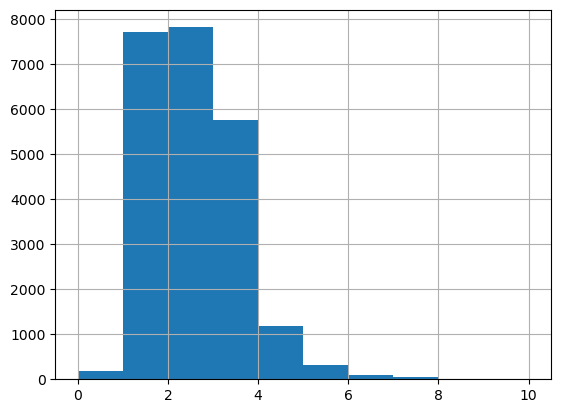

In [562]:
data['rooms'].hist(range=(0,10))

In [563]:
data['rooms'].describe()

count    23185.000000
mean         2.084882
std          1.079304
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

- в среднем количество комнат в выборке 1-2
- максимальное количество комнат 19
- минимально количество комнат 0 --> минимально количество комнат не может быть равным нулю. Стоит исключить записи с rooms = 0

In [564]:
data.shape

(23185, 28)

In [565]:
# исключим записи, где rooms == 0
data = data.loc[data['rooms']!=0, ]

In [566]:
data.shape

(23002, 28)

**Вывод (rooms)**
- было обнаружено, что в выборке присутсвуют объявления с количеством комнат 0, что нереалистично. Следовательно такие значения были исключены из датафрэйма

**Изучение переменной высота потолков**

- высота потолков (ceiling_height)

<Axes: >

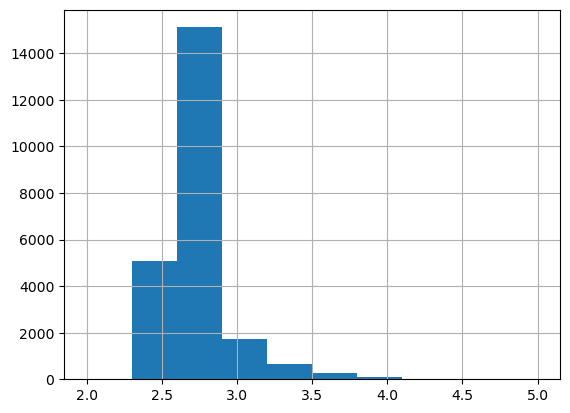

In [567]:
data['ceiling_height'].hist(range=(2, 5))

In [568]:
data['ceiling_height'].describe()

count    23002.000000
mean         2.722438
std          0.989249
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Максимальная высота потолка в выбоке 100 метров, что нереалистично. Рассмотрим уникальные значения высоты потолка в выборке.

In [569]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   2.5 ,   2.67,   2.56,   3.05,   2.75,   2.6 ,
         2.9 ,   2.8 ,   2.55,   3.  ,   2.61,   3.2 ,   3.25,   3.45,
         2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,   2.71,
         4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,   3.06,
         2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,   3.7 ,
         2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,   3.6 ,
         2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   2.79,   2.95,
         4.06,   2.94,   3.82,   3.54,   3.53,   2.83,   4.7 ,   2.4 ,
         3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,   3.35,   2.3 ,
         3.57,   2.48,   2.62,   2.82,   3.98,   3.03,   2.63,   3.83,
         3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.85,   3.86,
         4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,  32.  ,   3.08,
         3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,   2.81,   3.44,
      

В выборке представльно много нереалистичных значений, когда высота потолка 25 метров. Вероятно имелось в виду, что высота потолка 2,5 метров. Также исключим из выборки экстремально маленькие значения, когда высота потолка меньше 2 метров. Откорректируем значения в выборке.

In [570]:
data = data.loc[data['ceiling_height']>=2]
data.loc[data['ceiling_height']>10, 'ceiling_height'] = data['ceiling_height']/10

In [571]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.61,  3.2 ,  3.25,  3.45,  2.77,  2.85,
        2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,  2.73,
        2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,  2.78,
        2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,  2.  ,
        2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.16,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  2.79,  2.95,
        4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,  2.4 ,  3.38,
        3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,  3.57,  2.48,
        2.62,  2.82,  3.98,  3.03,  2.63,  3.83,  3.52,  3.95,  3.75,
        2.88,  3.67,  3.87,  3.85,  3.86,  4.19,  3.24,  4.8 ,  4.5 ,
        4.2 ,  3.36,  3.08,  3.07,  3.37,  3.09,  8.  ,  3.26,  3.34,
        2.81,  3.44,  3.14,  4.37,  2.68,  3.22,  3.27,  4.1 ,  2.93,
        3.46,  3.47,  3.63,  3.33,  3.32,  8.3 ,  2.98,  2.86,  3.17,
        4.4 ,  3.28,

**Вывод по переменной высота потолка**
- как правило высота потолка не превышает 3 метров
- максимальная высота потолка 100 метров
- были откорректированы экстремально большие значения высоты потолка и исключены записи с экстремально маленькими значениями 

(2.0, 5.0)

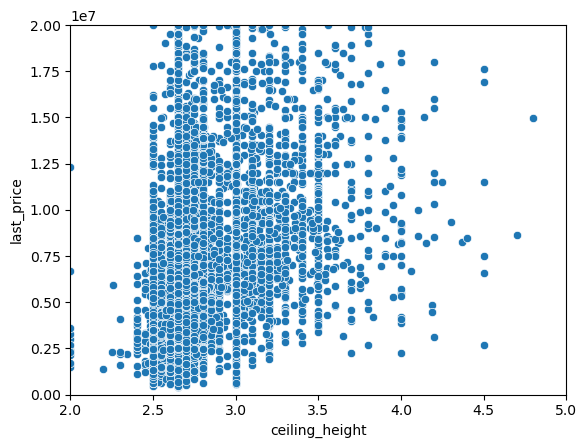

In [572]:
scatter = sns.scatterplot(data=data, x="ceiling_height", y="last_price")
scatter.set_ylim(bottom=0, top=20000000)
scatter.set_xlim(left=2, right=5)

In [573]:
data['ceiling_height'].describe()

count    22999.000000
mean         2.696309
std          0.236153
min          1.030000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [574]:
def categorize_ceiling(height):
    try:
        if (height > 2) and (height <= 2.65):
            return '2 - 2.65 meters'
        elif (height > 2.65) and (height < 3):
            return '2.65 - 3 meters'
        elif height > 3:
            return 'more than 3 meters'
    except:
        pass

In [575]:
data['ceiling_category'] = data['ceiling_height'].apply(categorize_ceiling)

In [576]:
data.groupby('ceiling_category').agg(average_price = ('last_price', 'mean'), average_price_per_meter = ('price_per_meter', 'mean'), average_heigh = ('ceiling_height', 'mean'), count = ('price_per_meter', 'count'))

,average_price,average_price_per_meter,average_heigh,count
ceiling_category,,,,
2 - 2.65 meters,5.257072e+06,91248.783963,2.602550,16359
2.65 - 3 meters,6.909243e+06,106777.837720,2.755669,4105
more than 3 meters,1.598632e+07,138374.675905,3.370062,1448


**Вывод**
- чем выше высота потолка, тем больше стоимость квартиры, как общая, так и в расчете на площадь
- большая часть квартир в выборке имеет потолки высотой до 3 метров
- меньше всего квартир в выбоке с потолками больше 3 метров 

**Изучение переменной этаж расположения квартиры**

- этаж расположения квартиры (floor_type)

<Axes: >

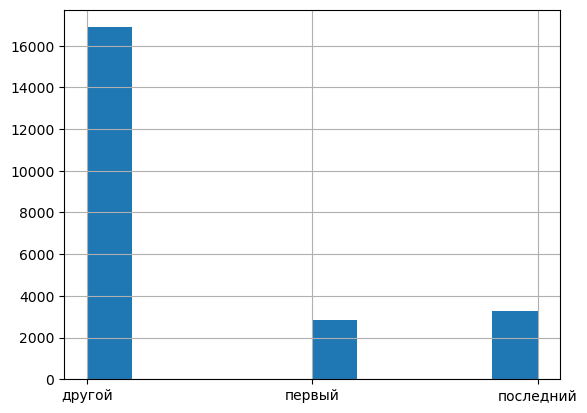

In [577]:
data['floor_type'].hist()

**Распределение переменной этаж расположения квартиры**
- переменная представляет только три значения: другой, первый, последний
- большинство квартир расположено ни на первом, ни на последнем этаже
- примерно одинаковое количество квартир из объявлений размещено на первом или последнем этаже 

**Изучение переменной количество этажей в доме**

- количество этаже в доме (floors_total)

<Axes: >

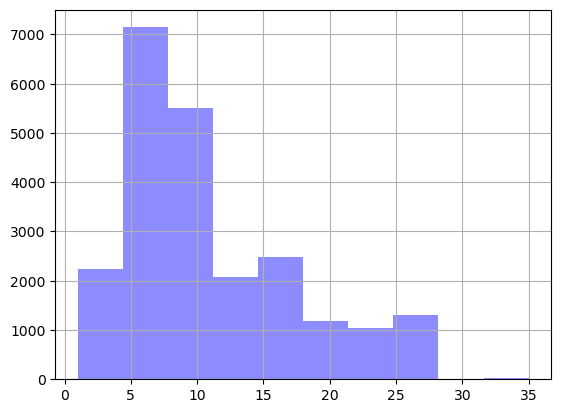

In [578]:
data['floors_total'].hist(color = 'blue', alpha = 0.45, range=(1,35))

In [579]:
data['floors_total'].describe()

count    22999.000000
mean        10.566851
std          6.530331
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

**Распределение переменной количество этажей**
- в большинстве домов не более 20 этажей в доме
- минимальное количество этажей в доме 1 (вероятно частный дом)
- максимальное количество этажей в доме 60

**Изучение переменной расстояние до центра в метрах**

- расстояние до центра города (cityCenters_nearest)

<Axes: >

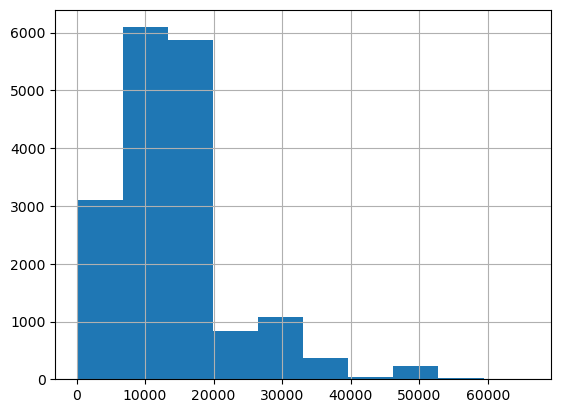

In [580]:
data['cityCenters_nearest'].hist()

In [581]:
data['cityCenters_nearest'].describe()

count    17668.000000
mean     14248.006509
std       8648.016418
min        181.000000
25%       9322.750000
50%      13114.000000
75%      16298.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [582]:
def categorize_area(city):
    try:
        if city<5000:
            return 'in the area of 5km'
        elif (city > 5000) and (city <= 10000):
            return 'in area from 5 to 10km'
        elif (city > 10000) and (city <= 15000):
            return 'in area from 10 to 15km'
        elif city > 15000:
            return 'more than 15 km'
    except:
        pass

In [583]:
data['city_area'] = data['cityCenters_nearest'].apply(categorize_area)

In [584]:
data.groupby('city_area').agg(average_price = ('last_price', 'mean'), average_price_per_meter = ('price_per_meter', 'mean'), average_total_area = ('total_area', 'mean'),  average_heigh = ('ceiling_height', 'mean'), count = ('price_per_meter', 'count')).sort_values(by='average_price', ascending = False)

,average_price,average_price_per_meter,average_total_area,average_heigh,count
city_area,,,,,
in the area of 5km,1.490088e+07,140684.230375,97.416707,2.994388,2001
in area from 5 to 10km,1.102463e+07,130599.453858,75.893564,2.799018,2893
in area from 10 to 15km,5.976825e+06,106957.319622,55.579799,2.650230,6611
more than 15 km,5.102261e+06,92825.795896,55.290282,2.647152,6163


**Вывод**

- чем ближе к центру города, тем в среднем больше стоимость квартиры (как общая, так и в расчете на площадь)
- больше всего квартир из выборки удалены от центра города более чем на 10 км


**Изучение переменной расстояние до ближайшего парка в метрах**

- расстояние до ближайшего парка (м) (parks_nearest)

<Axes: >

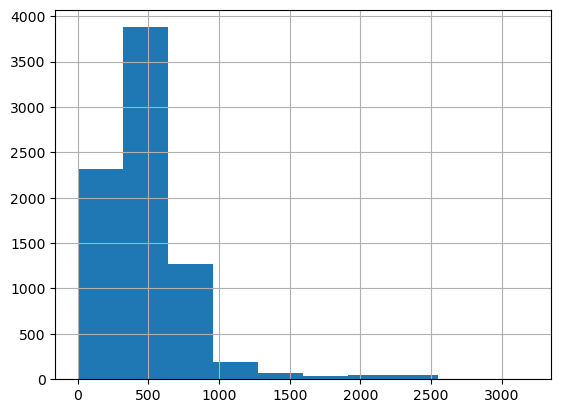

In [585]:
data['parks_nearest'].hist()

In [586]:
data['parks_nearest'].describe()

count    7868.000000
mean      490.370234
std       339.822596
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [587]:
def categorize_area(park):
    try:
        if park<=300:
            return 'in the area of 300m'
        elif (park > 300) and (park <= 500):
            return 'in area 500m'
        elif (park > 500):
            return 'in area more than 500m'
    except:
        pass

In [588]:
data['park_area'] = data['parks_nearest'].apply(categorize_area)

In [589]:
data.groupby('park_area').agg(average_price = ('last_price', 'mean'), average_price_per_meter = ('price_per_meter', 'mean'), average_total_area = ('total_area', 'mean'),  average_heigh = ('ceiling_height', 'mean'), count = ('price_per_meter', 'count')).sort_values(by='average_price', ascending = False).sort_values(by='average_price', ascending=False)

,average_price,average_price_per_meter,average_total_area,average_heigh,count
park_area,,,,,
in the area of 300m,9.728042e+06,120964.436300,71.342864,2.788256,2081
in area more than 500m,8.715104e+06,117195.692115,67.408447,2.735246,3296
in area 500m,8.627881e+06,116009.569490,68.925219,2.761036,2491


***
**Вывод**

- чем ближе парк расположен к квартире, тем выше в среднем стоимость квартиры
- чем ближе парк расположен к квартире, тем выше стоимость квартиры за квадратный метр
- для большинства квартир парк находится не дальше чем в 700 метрах

***

## Изучение скорости продажи квартир

<Axes: >

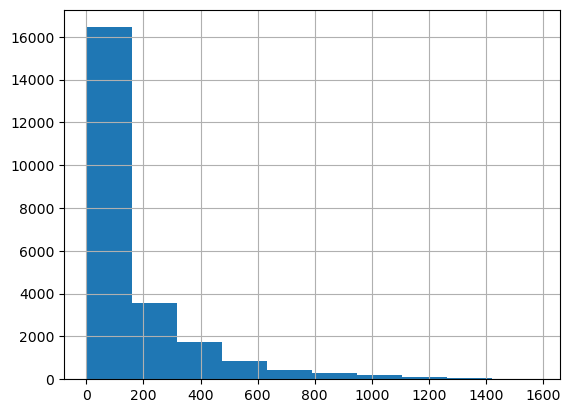

In [68]:
data['days_exposition'].hist()

<Axes: ylabel='days_exposition'>

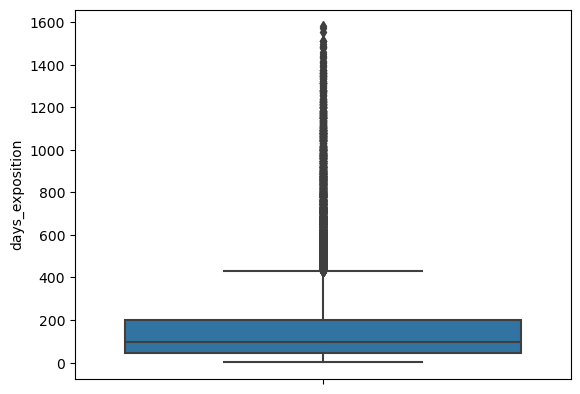

In [66]:
sns.boxplot(y=data["days_exposition"])

In [64]:
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Анализ скорости продажи квартир**
- В среднем квартиры продают в течение 170 дней
- Половина квартир продается в течение 95 дней
- исходя из информации полученной о распределении переменной быстрыми можно считать продажу квартиры в течение 50 дней, а необычно долгими продажи дольше 300-400 дней
- необычно быстрые продажи (минимальное значение) размещения объявления в днях - 1 день; необычно медленные продажи (максимальное значение) размещения объявления в днях - 1580 дней

## Определение факторов, влияющих на общую стоимость объекта

**Изучение зависимости цены от**

После рассмотрения переменных можно изучить отношения зависимости цены с следующими переменными
- общей площади (total_area)
- жилая площать (living_area)
- площадь кухни (kitchen_area)
- количество комнат (rooms)
- этаж расположения квартиры (floor_type)
- дата размещения (first_day_exposition)
- день недели размещения (weekday_posted)
- месяц размещения (month_posted)
- год размещения (year_posted)

построим диаграмы рассеивания для иллюстрации зависимости переменных

Перед рассмотрения зависимости рассмотрим ключевую переменную - цену квартиры 

<Axes: ylabel='last_price'>

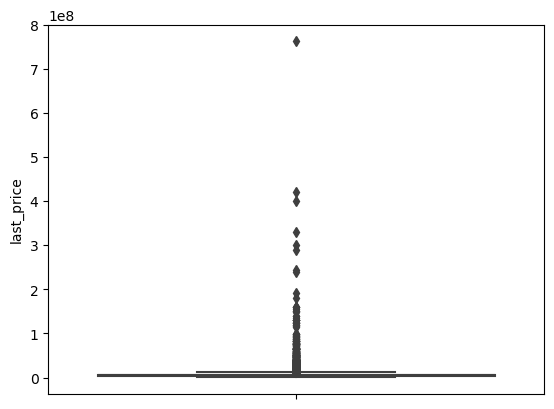

In [592]:
#построим ящик с усами для изучения распределения переменной цены квартиры
sns.boxplot(y=data["last_price"])

In [593]:
data[["last_price"]].describe()

,last_price
count,2.299900e+04
mean,6.497842e+06
std,1.072110e+07
min,4.300000e+05
25%,3.450000e+06
50%,4.650000e+06
75%,6.790000e+06
max,7.630000e+08


Распределение переменной цены имеет большое количество выбросов, что может исказить на результаты анализа зависимости с этой переменной. Следовательно, стоит исключить выбросы из анализа, установив лимит для варьирования переменной. 

**Цена VS площадь**

(0.0, 20000000.0)

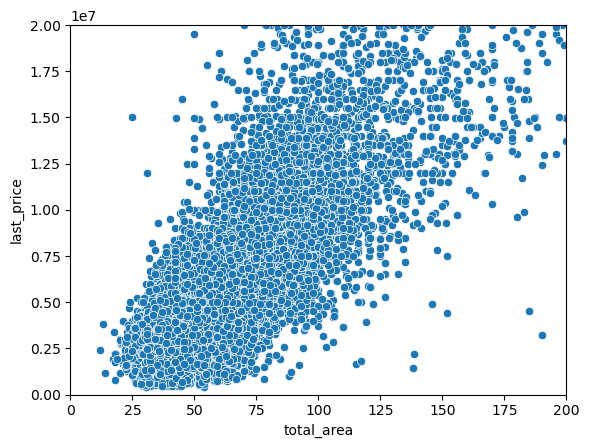

In [594]:
scatter = sns.scatterplot(data=data, x="total_area", y="last_price")
scatter.set_xlim(left=0, right=200)
scatter.set_ylim(bottom=0, top=20000000)

(0.0, 20000000.0)

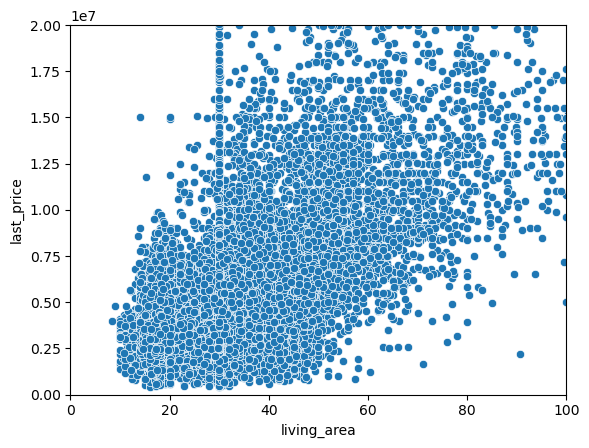

In [595]:
scatter = sns.scatterplot(data=data, x="living_area", y="last_price")
scatter.set_xlim(left=0, right=100)
scatter.set_ylim(bottom=0, top=20000000)

(0.0, 20000000.0)

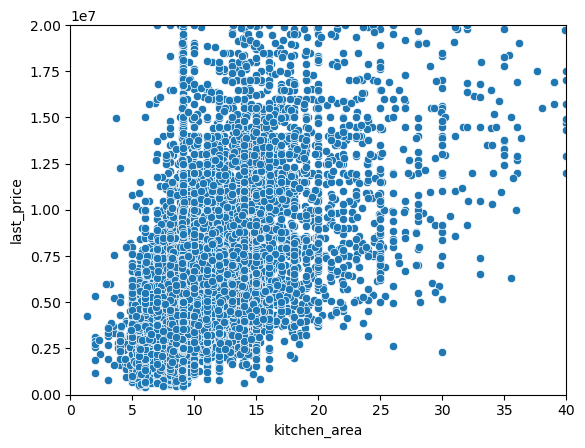

In [596]:
scatter = sns.scatterplot(data=data, x="kitchen_area", y="last_price")
scatter.set_xlim(left=0, right=40)
scatter.set_ylim(bottom=0, top=20000000)

- между площадью квартиры и ценой существует прямая зависимость: чем больше площадь, тем больше цена
- эта связь наиболее сильна между ценой и общей площадью
- наименее выражена связь между ценой и площадью кухни 

Для анализа взаимосвязи с последующими переменными будет использоваться стоимость квартиры за метр. Использование этой переменной, где стоимость нормированна к площади позволит сгладить влияние выбросов.

Рассморим распределение этой переменной, отражающей стоимость за метр (price_per_meter)

<Axes: ylabel='price_per_meter'>

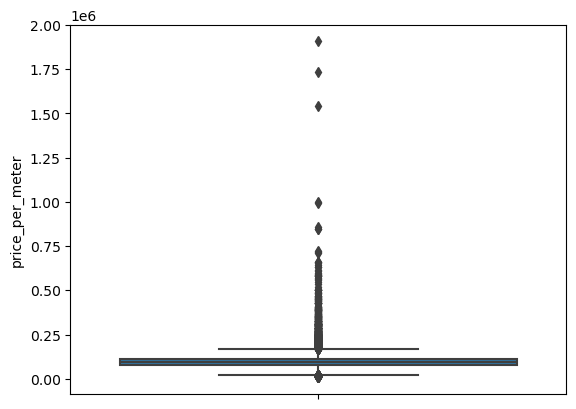

In [597]:
sns.boxplot(y=data["price_per_meter"])

In [598]:
data[["price_per_meter"]].describe()

,price_per_meter
count,2.299900e+04
mean,9.858484e+04
std,4.932698e+04
min,7.962960e+03
25%,7.612396e+04
50%,9.454545e+04
75%,1.133872e+05
max,1.907500e+06


Эта переменная также демонстрирует большое количество выбросов, однако она более равномерно распределена по сравнению с переменной стоимости квартиры 

**Цена VS количество комнат**

Количество комнат определенным образом связано с предыдущем показателем площадью квартиры. Следовательно, чем больше комнат, тем больше площадь квартиры. Построим график рассеяния, отражающий зависимость между количеством комнат и стоимостью за метер 

(0.0, 1000000.0)

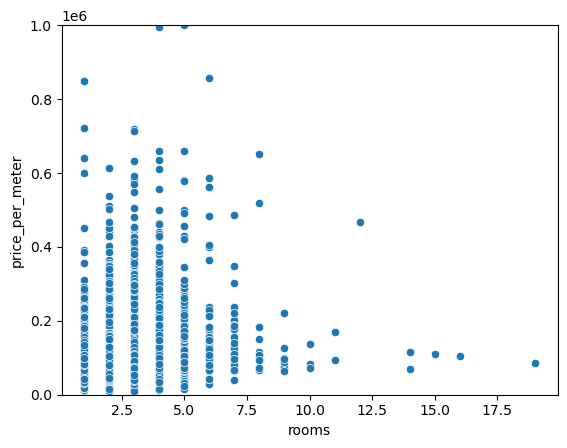

In [599]:
scatter = sns.scatterplot(data=data, x="rooms", y="price_per_meter")
scatter.set_ylim(bottom=0, top=1000000)

Однако, график показывает, что нет однозначной зависимости между количеством комнат и стоимостью за метр. Попробуем разделить квартиры в зависимости от количества комнат по группам.

In [600]:
def categorize_rooms(rooms):
    try:
        if rooms == 1:
            return 'A (1 room)'
        elif (rooms == 2) or (rooms == 3): 
            return 'B (2-3 rooms)'
        elif (rooms == 4) or (rooms == 5):
            return 'C (4-5 rooms)'
        elif rooms >=6:
            return 'D (more than 6 rooms)'
    except:
        pass

In [601]:
data['room_category'] = data['rooms'].apply(categorize_rooms)

In [602]:
data.groupby('room_category').agg(average_price = ('last_price', 'mean'), average_price_per_meter = ('price_per_meter', 'mean'), average_area = ('total_area', 'mean'), count = ('price_per_meter', 'count'))

,average_price,average_price_per_meter,average_area,count
room_category,,,,
A (1 room),3.794703e+06,100218.492730,37.530602,7714
B (2-3 rooms),6.563468e+06,95324.353006,64.851574,13593
C (4-5 rooms),1.557954e+07,113548.806251,118.920821,1499
D (more than 6 rooms),3.938122e+07,146703.158446,233.900259,193


**Вывод**
- чем больше комнат, тем больше стоимость квартиры
- стоимость однокомнатной квартиры за метр превышает стоимость за метр для двух- и трехкомнатных квартир
- в выборке больше всего объявлений с квартирами, где 2-3 комнаты
- в выборке меньше всего объявлений с квартирами где более 6 комнат 

**Цена VS тип этажа квартиры («первый», «последний», «другой»)**

**Изучение переменной этаж расположения квартиры**

- этаж расположения квартиры (floor_type)

<Axes: >

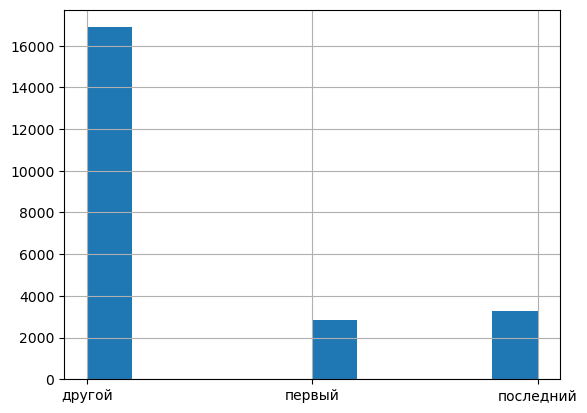

In [603]:
data['floor_type'].hist()

**Распределение переменной этаж расположения квартиры**
- переменная представляет только три значения: другой, первый, последний
- большинство квартир расположено ни на первом, ни на последнем этаже
- примерно одинаковое количество квартир из объявлений размещено на первом или последнем этаже 

In [604]:
data.groupby('floor_type').agg(average_price = ('last_price', 'mean'), average_price_per_meter = ('price_per_meter', 'mean'), average_total_area = ('total_area', 'mean'),  average_heigh = ('ceiling_height', 'mean'), count = ('price_per_meter', 'count'))

,average_price,average_price_per_meter,average_total_area,average_heigh,count
floor_type,,,,,
другой,6.647295e+06,102669.761113,60.461294,2.694126,16884
первый,4.764448e+06,81499.923434,56.525914,2.680482,2822
последний,7.217026e+06,92281.725758,65.016383,2.721066,3293


**Вывод**
- меньше всего стоят квартиры на первом этаже
- больше всего стоят квартиры на последнем этаже
- наибольшая стоимость за метр, характерна квартирам, которые не расположены ни на первом, ни на последнем этаже

**Цена VS дата размещения**

**Изучение переменной даты размещения**

- first_day_exposition (дата размещения)
- weekday_posted (день недели размещения)
- month_posted (месяц размещения)
- year_posted (год размещения)

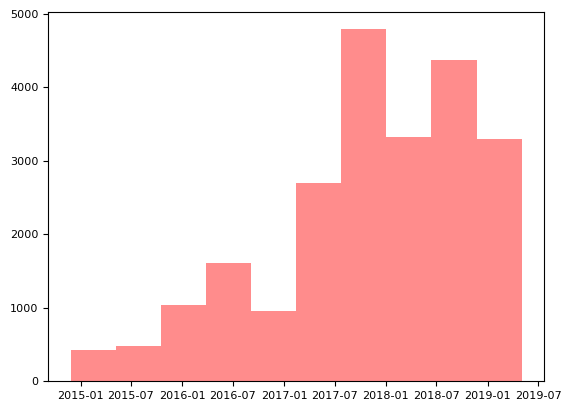

In [605]:
plt.hist(data['first_day_exposition'], alpha=0.45, color='red') 
plt.tick_params(axis='both', labelsize=8)

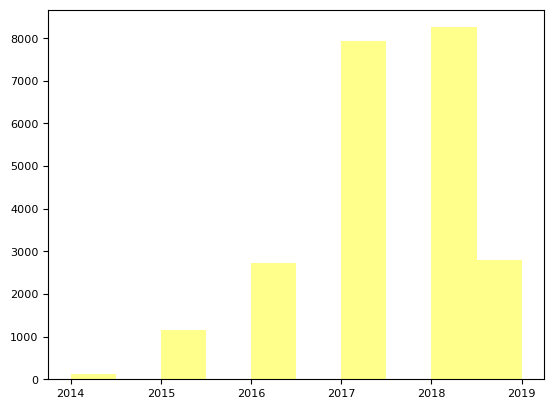

In [606]:
plt.hist(data['year_posted'], alpha=0.45, color='yellow') 
plt.tick_params(axis='both', labelsize=8)

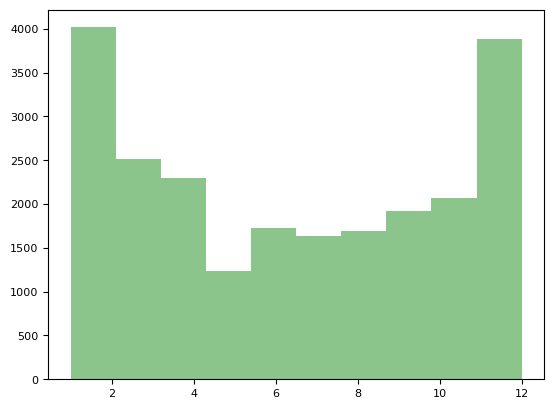

In [607]:
plt.hist(data['month_posted'], alpha=0.45, color='green', range=(1,12)) 
plt.tick_params(axis='both', labelsize=8)

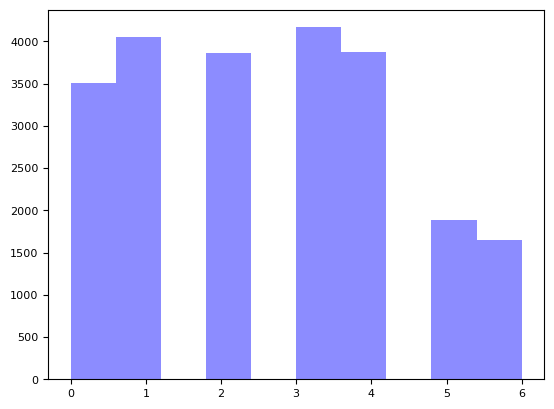

In [608]:
plt.hist(data['weekday_posted'], alpha=0.45, color='blue', range=(0,6)) 
plt.tick_params(axis='both', labelsize=8)

In [609]:
data[['first_day_exposition', 'weekday_posted', 'month_posted', 'year_posted']].describe()

,first_day_exposition,weekday_posted,month_posted,year_posted
count,22999,22999.000000,22999.000000,22999.000000
mean,2017-11-07 18:34:13.967563776,2.570590,6.400322,2017.364016
min,2014-11-27 00:00:00,0.000000,1.000000,2014.000000
25%,2017-05-11 00:00:00,1.000000,3.000000,2017.000000
50%,2017-12-12 00:00:00,3.000000,6.000000,2017.000000
75%,2018-08-26 00:00:00,4.000000,10.000000,2018.000000
max,2019-05-03 00:00:00,6.000000,12.000000,2019.000000
std,NaN,1.789408,3.490768,1.041667


**Распределение переменных даты размещения**
- в динамике количество объявлений растет с 2014 по 2019
- больше всего объявлений было размещено в периода с 2017 по 2018
- в 2019 году число записей существенно сократилось посравнению с предыдущим годом, однако это может быть связано с тем, что 2019 год взят не полностью
- больше всего объявлений в течение года размещалось в январе и декабре
- меньше всего объявлений размещалось в середине года, а именно в мае
- в будние дни размещалось примерно одинаковое количество объявлений
- в выходные дни размещается меньше всего объявлений 

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weekday_posted', ylabel='last_price'>

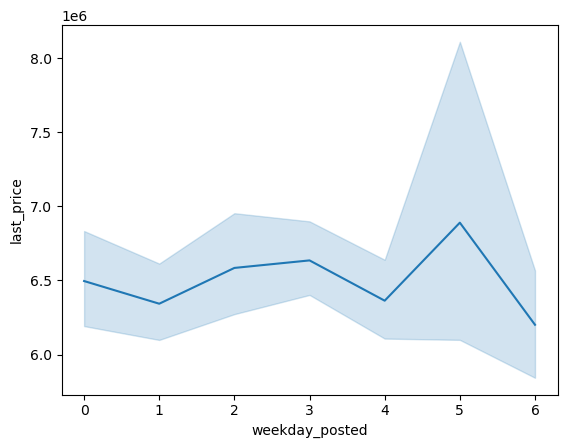

In [610]:
sns.lineplot(x="weekday_posted", y="last_price", data=data) 

In [611]:
data.groupby('weekday_posted').agg(average_price=('last_price', 'mean'), count=('last_price', 'count'))

,average_price,count
weekday_posted,,
0,6.496055e+06,3503
1,6.343145e+06,4053
2,6.584430e+06,3862
3,6.635152e+06,4167
4,6.363521e+06,3879
5,6.889649e+06,1883
6,6.201190e+06,1652


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month_posted', ylabel='last_price'>

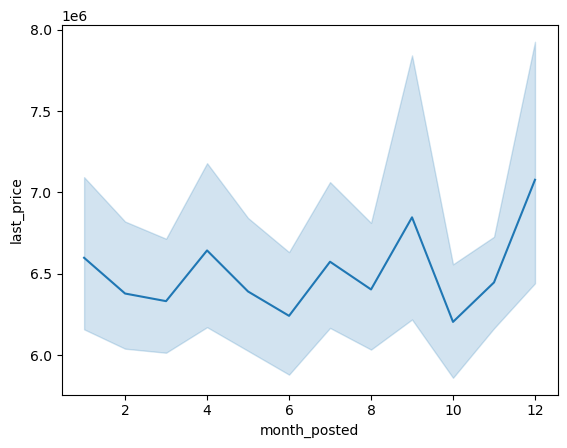

In [612]:
sns.lineplot(x="month_posted", y="last_price", data=data) 

In [613]:
data.groupby('month_posted').agg(average_price=('last_price', 'mean'), count=('last_price', 'count'))

,average_price,count
month_posted,,
1,6.597722e+06,1445
2,6.377809e+06,2573
3,6.330980e+06,2513
4,6.642843e+06,2301
5,6.390352e+06,1238
6,6.240615e+06,1723
7,6.573397e+06,1635
8,6.402899e+06,1687
9,6.846491e+06,1922


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year_posted', ylabel='last_price'>

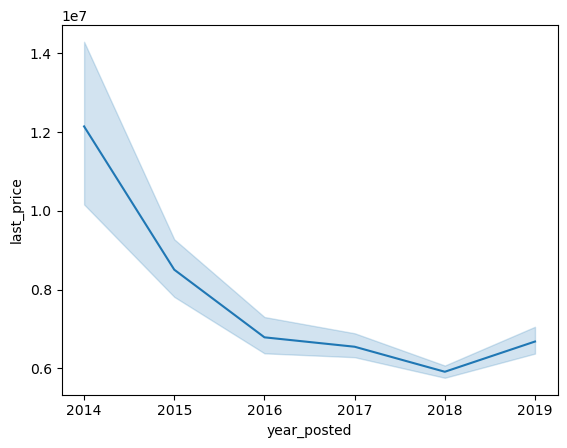

In [614]:
sns.lineplot(x="year_posted", y="last_price", data=data) 

In [615]:
data.groupby('year_posted').agg(average_price=('last_price', 'mean'), count=('last_price', 'count'))

,average_price,count
year_posted,,
2014,1.214207e+07,133
2015,8.505463e+06,1165
2016,6.788785e+06,2733
2017,6.550040e+06,7923
2018,5.914925e+06,8256
2019,6.682242e+06,2789


***
**Вывод**
- в среднем квартиры опубликованные в субботу были проданы по более высокой цене, а квартиры опубликованные в воскресенье - по самой низкой цене
- квартиры опубликованные в декабре в среднем были проданы дороже всего, а квартиры опубликованные в октябре были проданы дешевле всего
- квартиры опубликованные в 2014 году были в среднем проданы дороже всего, а квартиры размещенные в 2018 году были проданы дешевле всего

***

## Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [616]:
#определим 10 населенных пунктов с наибольшим числом объявлений
locality_list = data['locality_name'].value_counts().nlargest(10).index
locality_list

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object', name='locality_name')

In [617]:
data.loc[data['locality_name'].isin(locality_list), ].groupby('locality_name').agg(average_price = ('last_price', 'mean'), count = ('locality_name', 'count')).sort_values(by='average_price', ascending=False)

,average_price,count
locality_name,,
Санкт-Петербург,7.990510e+06,15260
Пушкин,6.402529e+06,361
поселок Парголово,4.545982e+06,307
деревня Кудрово,4.337754e+06,270
поселок Шушары,4.139367e+06,425
Колпино,3.964021e+06,338
Всеволожск,3.818413e+06,388
поселок Мурино,3.733307e+06,506
Гатчина,3.487235e+06,304


***
**Вывод**
- больше всего объявлений в выборке относятся к городу Санкт-Петербург
- наибольшая средняя стоимость за квадратный метр представлена в Санкт-Петербурге и в городе Пушкин
- наименьшая стоимость за квадратный метр среди 10 населенных пунктов с наибольшим числом объявлений характерна для городов Гатчина и Выборг
***

## Выделение квартир в Санкт-Петербурге с помощью столбца `locality_name` и вычисление их средней стоимости на разном удалении от центра

In [618]:
df = data.loc[data['locality_name'] == 'Санкт-Петербург', ].copy()
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_meter,weekday_posted,month_posted,year_posted,floor_type,cityCenters_nearest_km,ceiling_category,city_area,park_area,room_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,120370.37,3,3,2019,другой,16.0,2.65 - 3 meters,more than 15 km,in area 500m,B (2-3 rooms)
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,92785.71,3,8,2015,другой,14.0,2 - 2.65 meters,in area from 10 to 15km,in the area of 300m,B (2-3 rooms)
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,408176.10,4,7,2015,другой,7.0,2 - 2.65 meters,in area from 5 to 10km,in the area of 300m,B (2-3 rooms)
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,30.0,22,True,...,110544.69,3,4,2019,другой,12.0,2 - 2.65 meters,in area from 10 to 15km,None,B (2-3 rooms)
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,88524.59,6,2,2017,другой,15.0,2 - 2.65 meters,more than 15 km,None,B (2-3 rooms)
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,127525.25,3,11,2017,другой,14.0,2.65 - 3 meters,in area from 10 to 15km,in area 500m,A (1 room)
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,True,...,119230.77,5,11,2017,другой,14.0,2 - 2.65 meters,in area from 10 to 15km,in area more than 500m,A (1 room)
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,True,...,81707.32,3,11,2017,первый,11.0,more than 3 meters,in area from 10 to 15km,in area 500m,B (2-3 rooms)
17,6,4180000.0,36.0,2016-09-09,1,2.65,17,16.5,7,True,...,116111.11,4,9,2016,другой,15.0,2 - 2.65 meters,in area from 10 to 15km,None,A (1 room)
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,True,...,104838.71,4,1,2017,другой,11.0,2 - 2.65 meters,in area from 10 to 15km,in area more than 500m,A (1 room)


<Axes: >

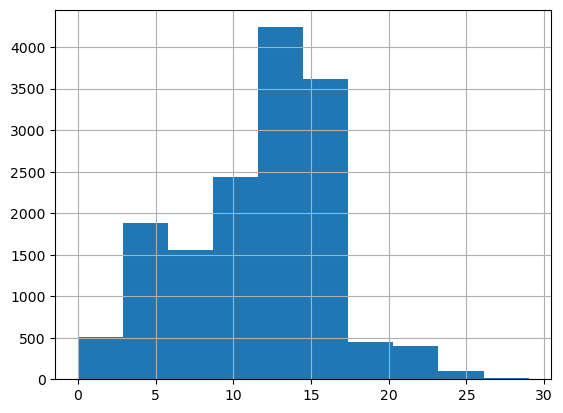

In [619]:
df['cityCenters_nearest_km'].hist()

In [620]:
df['cityCenters_nearest_km'].describe()

count    15202.000000
mean        11.621431
std          4.850114
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: cityCenters_nearest_km, dtype: float64

In [621]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round()

In [622]:
x = df.groupby('cityCenters_nearest_km').agg(average_price=('last_price', 'mean'), average_price_per_meter = ('price_per_meter', 'mean'), count = ('locality_name', 'count')).sort_values(by='cityCenters_nearest_km', ascending = True)
x

,average_price,average_price_per_meter,count
cityCenters_nearest_km,,,
0.0,2.989127e+07,233968.987200,25
1.0,2.148096e+07,178211.495241,187
2.0,1.807256e+07,157846.028182,297
3.0,1.117388e+07,120341.496488,336
4.0,1.332518e+07,131732.697014,663
5.0,1.405584e+07,138305.659943,883
6.0,1.492848e+07,147124.065394,584
7.0,1.450194e+07,152943.651910,398
8.0,9.958307e+06,124735.667958,573


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cityCenters_nearest_km', ylabel='average_price'>

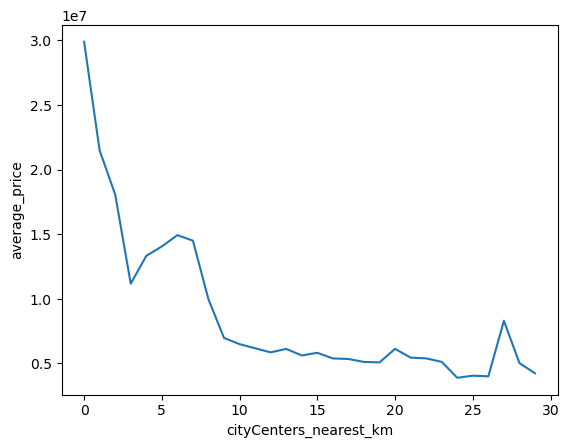

In [624]:
sns.lineplot(x="cityCenters_nearest_km", y="average_price", data=x) 

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cityCenters_nearest_km', ylabel='average_price_per_meter'>

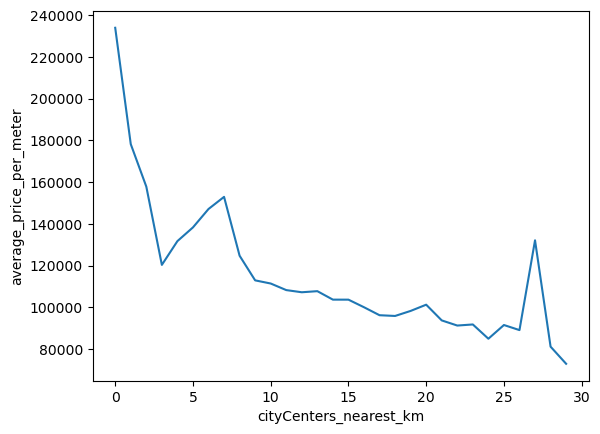

In [625]:
sns.lineplot(x="cityCenters_nearest_km", y="average_price_per_meter", data=x) 

***
**Вывод**
- в среднем чем больше удаленность квартиры от центра, тем меньше ее стоимость (включая стоимость за квадратный метр)
- на растоянии от 4-7 киллометров данные показывают некоторый пик, что может быть связано с расположением 'элитных жилых комплексов на этом расстоянии, что завышает среднюю стоимость квартир на этом расстоянии
- второй пик наблюдается на расстоянии от 25 до 28 км. Небольшое количество объявлений и большая удаленность от центра могут указывать на то, что объявления даны на частные дома, стоимость которых, как правило превышает стоимость квартир в многоквартирных домах.

***

<div style="border:solid blue 2px; padding: 20px">

**Общий вывод**

1. **Предобработка данных**

   *Были изучены пропуски данных. Где было возможно пропуски были заменены медианными или нулевыми значениями:*
    - Заменены медианным значением: ceiling_height, floors_total, living_area, kitchen_area, days_exposition
    - Заменены нулевым значением: balcony, parks_around3000, ponds_around3000
    - Переменные, где пропуски в данных вероятно связаны с проблемами подгрузки данных и геосервиса: airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, locality_name

   *Были заменены типы данных (в силу смысла, который несут данные):*
    - first_day_exposition (object -> date_time)
    - floors_total (float -> int) - число этажей не может быть нецелым
    - is_apartment (object -> bool)
    - balcony (float -> int) - число балконов не может быть нецелым
    - parks_around3000 (float -> int) - количество ближайших парков не может быть нецелым числом
    - ponds_around3000 (float -> int) - количество ближайших водоемов не может быть нецелым числом
    - days_exposition (float -> int) - количество дней не может быть нецелым
  
   *Устранены неявные дупликаты в названиях населенных пунктов (locality_name)*

   *Добавлены новые переменные*
    - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
    - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - месяц публикации объявления;
    - год публикации объявления;
    - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
    - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

2. **Предварительный анализ данных:**

   *Показатели площади квартиры (общая площадь (total_area), жилая площать (living_area), площадь кухни (kitchen_area))*
    - Распределение этих трех переменных отражает тенденцию, которой должны соответствовать каждая запись в датафрейме: общая площадь квартиры (total_area) > жилая площадь квартиры (living_area) > площадь кухни (kitchen_area)
    - Были исключены записи, которые не удовлетворяют этому условию

   *Цена объекта (last_price)*
    - для распределения переменной цены объекта (last_price) характерно большое количество выбросов, которые стоит учитывать при изучении зависимостей цены от других факторов

   *Количество комнат (rooms)*
    - было обнаружено, что в выборке присутсвуют объявление с количеством комнат 0, что нереалистично. Такие записи были исключены из выборки
  
   *Высота потолка (ceiling_height)*
    - были обнаружены экстремально большие и маленькие значения переменной
    - экстремально большие значения, вероятно являются ошибкой записи (например 25 вместо 2,5) -> такие значения были откорректированы
    - экстремально маленькие значения с высотой потолка около 1 метра были исключены из анализа
    - чем выше высота потолка, тем больше стоимость квартиры, как общая, так и в расчете на площадь

   *Тип этажа*
    - переменная представляет только три значения: другой, первый, последний
    - большинство квартир расположено ни на первом, ни на последнем этаже
    - примерно одинаковое количество квартир из объявлений размещено на первом или последнем этаже
  
   *Общее количество этажей в доме (floors_total)*
    - в большинстве домов не более 20 этажей в доме
    - минимальное количество этажей в доме 1 (вероятно частный дом)
    - максимальное количество этажей в доме 60

   *Расстояние до центра в метрах (cityCenters_nearest)*
    - чем ближе к центру города, тем в среднем больше стоимость квартиры (как общая, так и в расчете на площадь)
    - больше всего квартир из выборки удалены от центра города более чем на 10 км

   *Расстояние до ближайшего парка (parks_nearest)*
   - чем ближе парк расположен к квартире, тем выше в среднем стоимость квартиры
   - чем ближе парк расположен к квартире, тем выше стоимость квартиры за квадратный метр
   - для большинства квартир парк находится не дальше чем в 700 метрах

3. **Изучение скорости продажи квартир**
   - в среднем квартиры продают в течение 170 дней
   - половина квартир продается в течение 95 дней
   - необычно быстрые продажи (минимальное значение) размещения объявления в днях - 1 день; необычно медленные продажи (максимальное значение) размещения объявления в днях - 1580 дней

4. **Изучение факторов, влияющих на полную стоимость объекта**
   
   *Цена VS площадь*
    - между площадью квартиры и ценой существует прямая зависимость: чем больше площадь, тем больше цена
    - эта связь наиболее сильна между ценой и общей площадью
    - наименее выражена связь между ценой и площадью кухни
  
   *Цена VS количество комнат*
   - чем больше комнат, тем больше стоимость квартиры
   - стоимость однокомнатной квартиры за метр превышает стоимость за метр для двух- и трехкомнатных квартир
   - в выборке больше всего объявлений с квартирами, где 2-3 комнаты
   - в выборке меньше всего объявлений с квартирами где более 6 комнат
   
   *Цена VS тип этажа, на котором расположена квартира*
    - меньше всего стоят квартиры на первом этаже
    - больше всего стоят квартиры на последнем этаже
    - наибольшая стоимость за метр, характерна квартирам, которые не расположены ни на первом, ни на последнем этаже

   *Цена VS дата размещения*
    - в среднем квартиры опубликованные в субботу были проданы по более высокой цене, а квартиры опубликованные в воскресенье - по самой низкой цене
    - квартиры опубликованные в декабре в среднем были проданы дороже всего, а квартиры опубликованные в октябре были проданы дешевле всего
    - квартиры опубликованные в 2014 году были в среднем проданы дороже всего, а квартиры размещенные в 2018 году были проданы дешевле всего

   Таким образом стоимость квартиры зависит от всех перемечисленных факторов: площадь (общую, жилую и кухни), количество комнат, тип этажа, дата размещения (день недели, месяц, год)

5. **Подсчет стоимости одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений**
   - больше всего объявлений в выборке относятся к городу Санкт-Петербург
   - наибольшая средняя стоимость за квадратный метр представлена в Санкт-Петербурге и в городе Пушкин
   - наименьшая стоимость за квадратный метр среди 10 населенных пунктов с наибольшим числом объявлений характерна для городов Гатчина и Выборг
  
6. **Вычисление стоимости квартир в Санкт-Петербурге на разном удалении от центра**
   - в среднем чем больше удаленность квартиры от центра, тем меньше ее стоимость (включая стоимость за квадратный метр)
   - на растоянии от 4-7 киллометров данные показывают некоторый пик, что может быть связано с расположением 'элитных жилых комплексов на этом расстоянии, что завышает среднюю стоимость квартир на этом расстоянии
   - второй пик наблюдается на расстоянии от 25 до 28 км. Небольшое количество объявлений и большая удаленность от центра могут указывать на то, что объявления даны на частные дома, стоимость которых, как правило превышает стоимость квартир в многоквартирных домах.